In [1]:
# Librairies de base
import os
import random
import numpy as np
import pandas as pd
import time

# Graphes
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.tree import export_graphviz
from IPython.display import Image

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Eviter les Deprecated warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

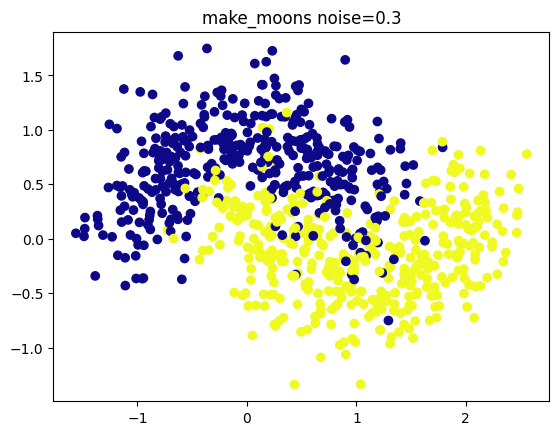

In [2]:
X, y = make_moons(n_samples=800, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)
plt.scatter(X[:,0],X[:,1], c = y,cmap='plasma');
plt.title('make_moons noise=0.3')
plt.show()

In [3]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    algorithm="SAMME.R", learning_rate=0.3, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.3, n_estimators=100, random_state=42)

Arbre N° 76


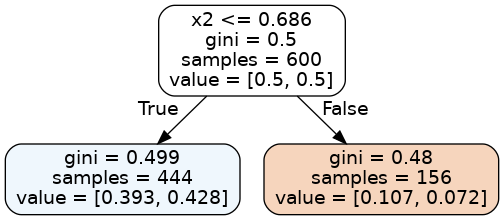

In [4]:
rd_tree=random.randint(0,99)
print('Arbre N°',rd_tree)

export_graphviz(ada_clf.estimators_[rd_tree],
                feature_names=['x1','x2'],
                out_file = 'tree.dot',
                filled=True,
                rounded=True)

#appel à la fonction dot de graphwiz
os.system("dot -Tpng tree.dot -o tree.png")
#Affichage de l'image créée
Image("tree.png")

In [5]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True,showlabel=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if showlabel:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo", alpha=alpha)
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ys", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

score Adaboost : 0.91


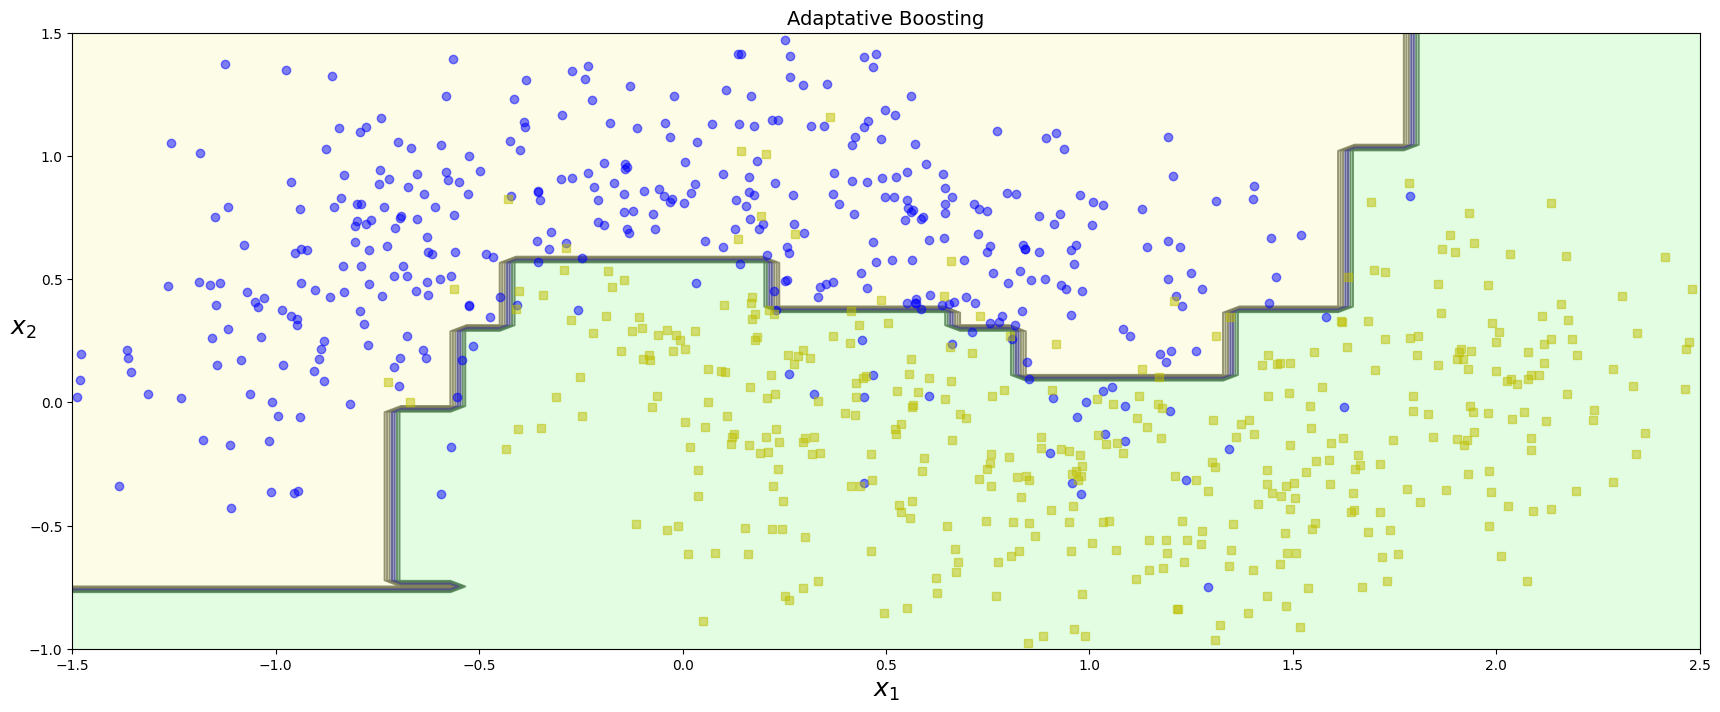

In [6]:
y_pred_ada = ada_clf.predict(X_test)
print('score Adaboost :' , accuracy_score(y_test, y_pred_ada))
plt.figure(figsize=(21,8))
plot_decision_boundary(ada_clf, X, y)
plt.title("Adaptative Boosting", fontsize=14)
plt.show()

In [7]:

#On passe à 80000 pour mieux voir, sinon on aura trop peu d'itérations
X, y = make_moons(n_samples=80000, noise=0.3, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X, y, random_state=43)

n_estimators=500

# Exécution du Gradient Boosting sans Early Stopping
start = time.time()
gb = GradientBoostingClassifier(
    n_estimators=n_estimators,
    random_state=42
)
gb.fit(X_train, y_train)
time_gb=(time.time() - start)

# Exécution du Gradient Boosting avec Early Stopping
start = time.time()
# Si pas d'amélioration > 0.0001 sur les 5 derniers estimateurs => Arrêt
gbes = GradientBoostingClassifier(
    n_estimators=n_estimators,
    n_iter_no_change=5, tol=0.0001,
    random_state=42)
gbes.fit(X_train, y_train)
time_gbes=(time.time() - start)

# Calcul des scores
score_gb =gb.score(X_dev, y_dev)
score_gbes= gbes.score(X_dev, y_dev)

# Nombre d'estimateurs
nb_estimators_gb=gb.n_estimators_
nb_estimators_gbes=gbes.n_estimators_

# Création et affichage en utilisant un DataFrame
dict_result = {
    "scores":[score_gb * 100,score_gbes * 100],
    "estimateurs":[nb_estimators_gb,nb_estimators_gbes],
    "temps":[time_gb,time_gbes]
}
pd.DataFrame(dict_result,index=['Normal','Early stopping']).round(2)

,scores,estimateurs,temps
Normal,91.21,500,27.04
Early stopping,91.38,104,5.30


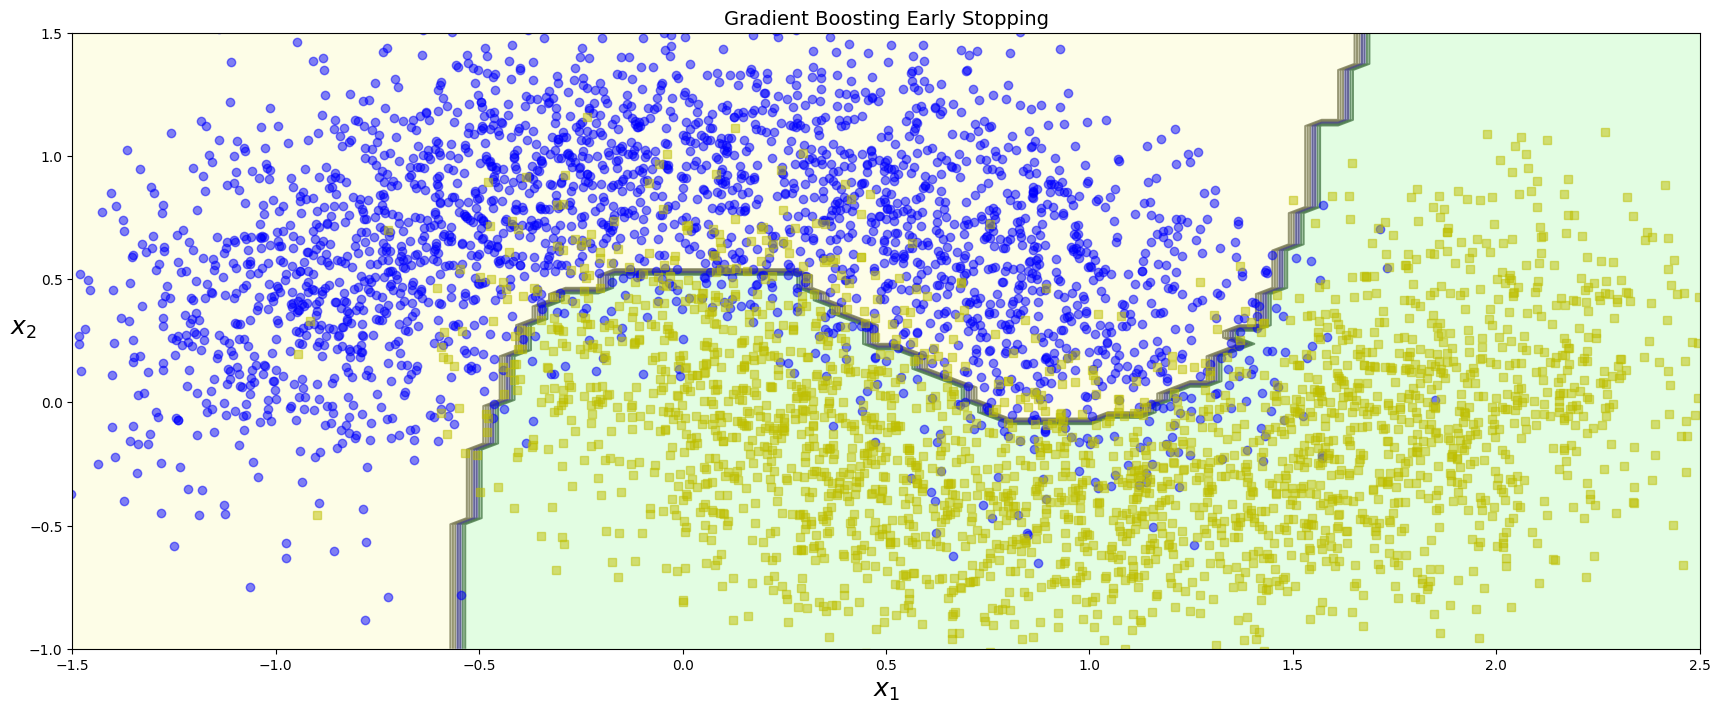

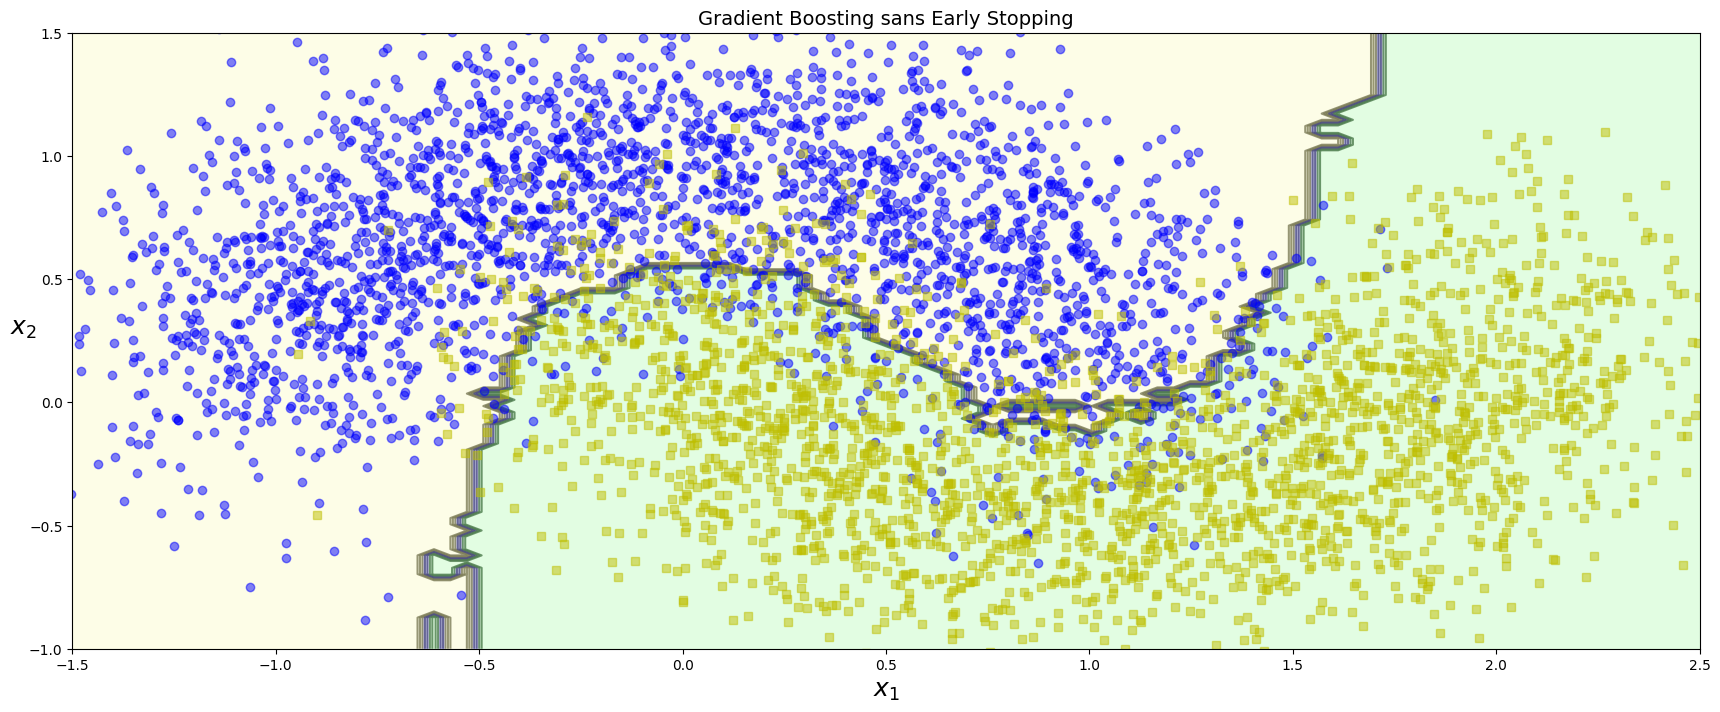

In [8]:
plt.figure(figsize=(21,8))
plot_decision_boundary(gbes, X_dev[:5000], y_dev[:5000])
plt.title("Gradient Boosting Early Stopping", fontsize=14)
plt.show()

plt.figure(figsize=(21,8))
plot_decision_boundary(gb, X_dev[:5000], y_dev[:5000])
plt.title("Gradient Boosting sans Early Stopping", fontsize=14)
plt.show()
